In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%precision %.3f
pd.set_option('precision', 3)

In [2]:
path = './data/ch4_scores400.csv'
df = pd.read_csv(path)
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [4]:
scores = np.array(df['score'])
scores[:5]

array([76, 55, 80, 80, 74], dtype=int64)

# 모집단과 표본

In [5]:
# 복원추출
np.random.choice([1,2,3],3)

array([1, 1, 2])

In [6]:
# 비복원추출
np.random.choice([1,2,3],3, replace=False)

array([3, 2, 1])

In [7]:
sample = np.random.choice(scores, 20)
sample.mean()

71.15

In [8]:
scores.mean()

69.53

## 확률 모형

In [9]:
# 확률분포
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

np.random.choice(dice, p=prob)

6

In [10]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([3, 6, 5, 5, 6, 4, 2, 5, 5, 2, 6, 5, 1, 3, 2, 6, 3, 5, 3, 6, 2, 2,
       3, 3, 2, 3, 5, 1, 4, 5, 4, 3, 3, 5, 5, 4, 6, 6, 6, 6, 5, 1, 5, 4,
       5, 5, 4, 6, 4, 4, 4, 6, 6, 3, 5, 5, 6, 1, 4, 6, 6, 4, 3, 5, 5, 3,
       6, 5, 1, 6, 3, 1, 3, 5, 2, 6, 1, 3, 5, 5, 3, 2, 4, 4, 5, 6, 6, 6,
       5, 6, 4, 4, 5, 6, 1, 6, 3, 3, 1, 6])

In [13]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq, 'relative frequency':freq/num_trial},
            index = pd.Index(dice, name='dice'))

,frequency,relative frequency
dice,,
1,9,0.09
2,8,0.08
3,18,0.18
4,15,0.15
5,25,0.25
6,25,0.25


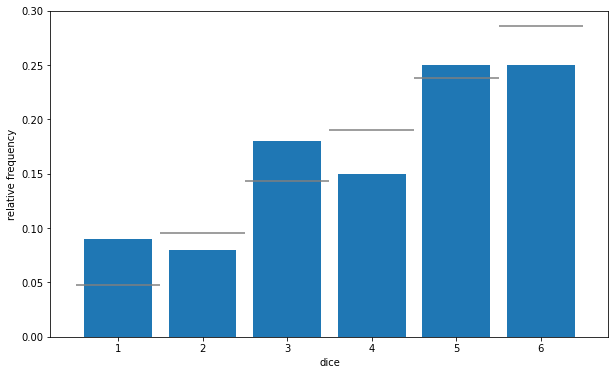

In [20]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프의 1.5, 2.5, ... 6.5에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사의 눈에 맞추기
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

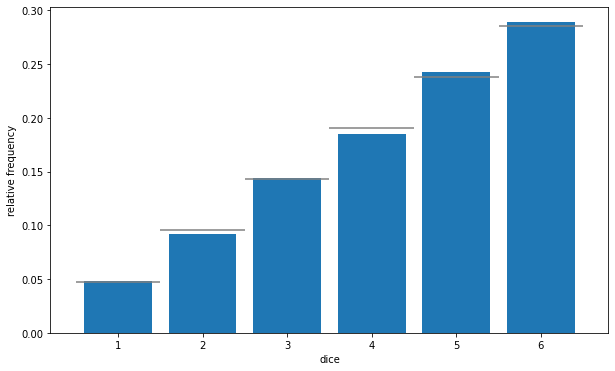

In [22]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프의 1.5, 2.5, ... 6.5에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사의 눈에 맞추기
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

# 3. 추측통계의 확률

## 전체 데이터 히스토그램

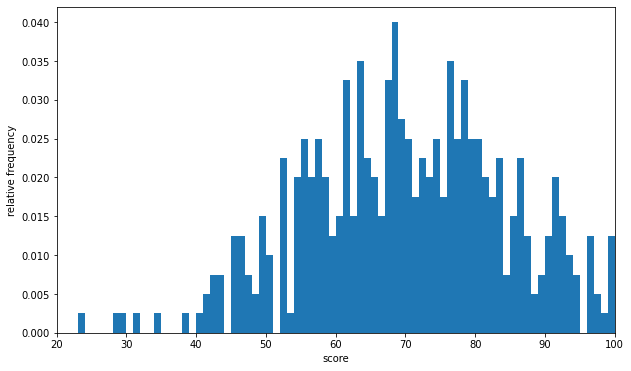

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

## 10000개의 표본 데이터 히스토그램

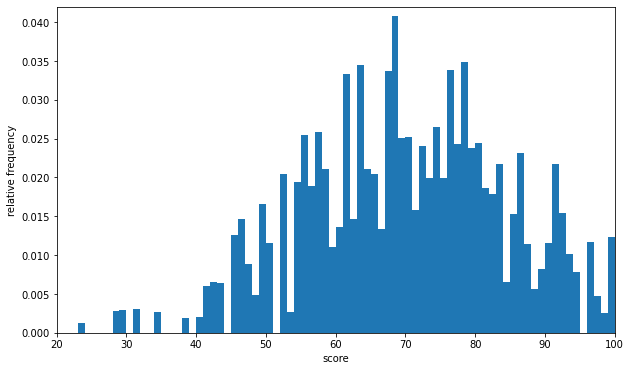

In [27]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

## 10000개의 평균(20개의 데이터) 히스토그램

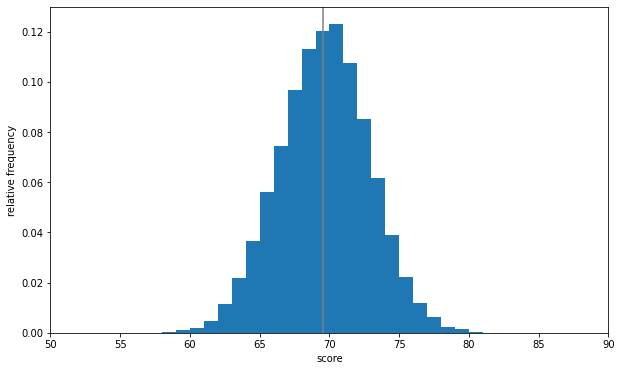

In [30]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray') # ax.vlines(value, ymin, ymax, color)
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()